In [5]:
#Importation des librairies
import pandas as pd
import mlxtend
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# MINI Dataset

In [6]:
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],
           ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],
           ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],
           ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],
           ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

In [7]:
#Conversion de la liste en valeurs booléennes
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary,columns=te.columns_)
df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [8]:
apriori(df)

,support,itemsets
0,0.6,(2)
1,0.8,(5)
2,0.8,(7)
3,0.6,(9)
4,0.6,"(5, 7)"
5,0.6,"(9, 5)"


In [10]:
frequent_itemsets = apriori(df,min_support=0.1,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4,(Dress)
1,0.4,(Earrings)
2,0.6,(Hat)
3,0.4,(Heels)
4,0.2,(Necklace)
...,...,...
146,0.2,"(Hat, Heels, Earrings, Scarf, Necklace)"
147,0.2,"(Pants, Earrings, Scarf, Skirt, Shirt)"
148,0.2,"(Hat, Pants, Scarf, Skirt, Sneakers)"
149,0.2,"(Hat, Sunglasses, Pants, Skirt, Sneakers)"


In [11]:
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Heels),(Dress),0.4,0.4,0.4,1.0,2.50,0.24,inf
1,(Dress),(Heels),0.4,0.4,0.4,1.0,2.50,0.24,inf
2,(Necklace),(Dress),0.2,0.4,0.2,1.0,2.50,0.12,inf
3,(Sandals),(Dress),0.2,0.4,0.2,1.0,2.50,0.12,inf
4,(Dress),(Scarf),0.4,0.8,0.4,1.0,1.25,0.08,inf
...,...,...,...,...,...,...,...,...,...
670,"(Earrings, Dress)","(Heels, Necklace, Scarf, Hat)",0.2,0.2,0.2,1.0,5.00,0.16,inf
671,"(Necklace, Earrings)","(Heels, Scarf, Hat, Dress)",0.2,0.2,0.2,1.0,5.00,0.16,inf
672,"(Necklace, Scarf)","(Heels, Earrings, Hat, Dress)",0.2,0.2,0.2,1.0,5.00,0.16,inf
673,"(Necklace, Dress)","(Heels, Earrings, Scarf, Hat)",0.2,0.2,0.2,1.0,5.00,0.16,inf


In [12]:
association_rules(frequent_itemsets,metric="lift",min_threshold=1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Earrings),(Dress),0.4,0.4,0.2,0.50,1.25,0.04,1.200000
1,(Dress),(Earrings),0.4,0.4,0.2,0.50,1.25,0.04,1.200000
2,(Heels),(Dress),0.4,0.4,0.4,1.00,2.50,0.24,inf
3,(Dress),(Heels),0.4,0.4,0.4,1.00,2.50,0.24,inf
4,(Necklace),(Dress),0.2,0.4,0.2,1.00,2.50,0.12,inf
...,...,...,...,...,...,...,...,...,...
1135,(Heels),"(Hat, Earrings, Scarf, Dress, Necklace)",0.4,0.2,0.2,0.50,2.50,0.12,1.600000
1136,(Earrings),"(Hat, Heels, Scarf, Dress, Necklace)",0.4,0.2,0.2,0.50,2.50,0.12,1.600000
1137,(Scarf),"(Hat, Heels, Earrings, Dress, Necklace)",0.8,0.2,0.2,0.25,1.25,0.04,1.066667
1138,(Dress),"(Hat, Heels, Earrings, Scarf, Necklace)",0.4,0.2,0.2,0.50,2.50,0.12,1.600000


# GRAND Dataset

In [14]:
#Importation du Dataset
data_MBO=pd.read_csv("C:/Users/E682/Downloads/data/Market_Basket_Optimisation.csv",header=None)
data_MBO.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


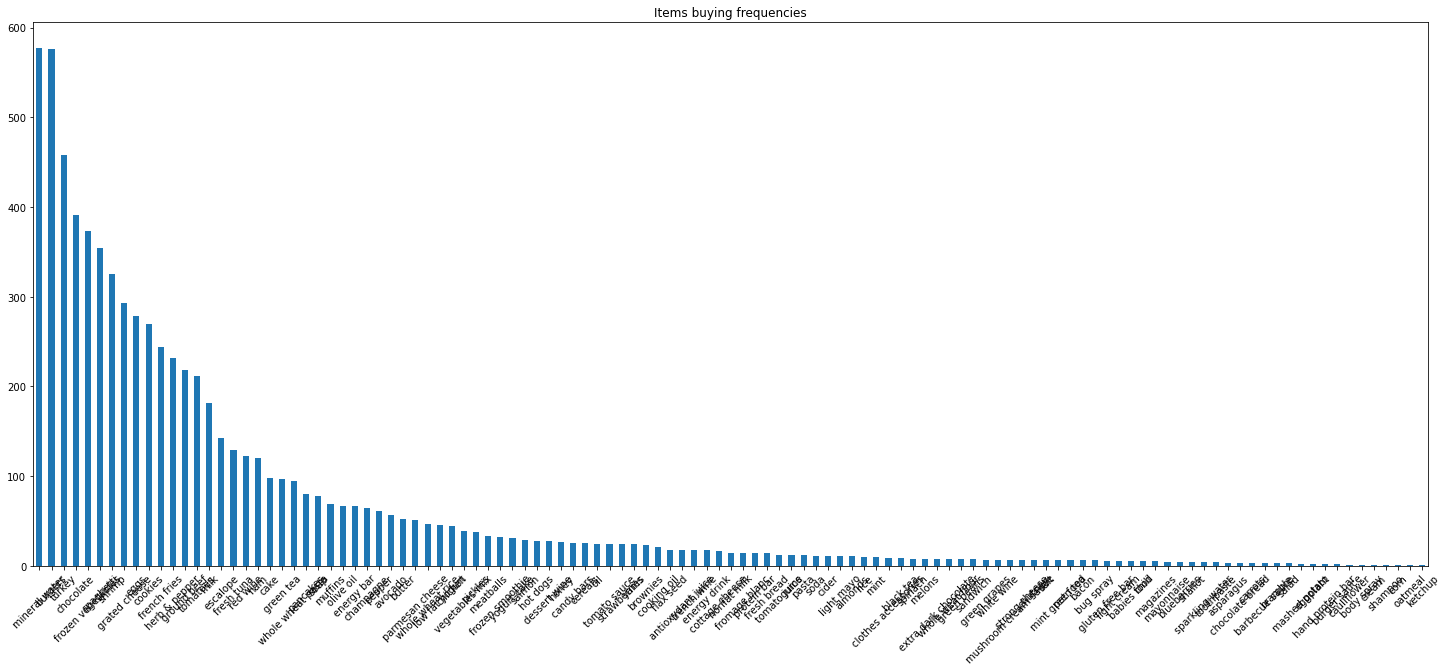

In [17]:
#Visualisation des fréquences d'achat des articles 
plt.figure(figsize=(25,10))
graph1 = data_MBO[0].value_counts()
graph1.plot.bar()
plt.xticks(rotation=45)
plt.title("Fréquence d'achat des articles")
plt.show()

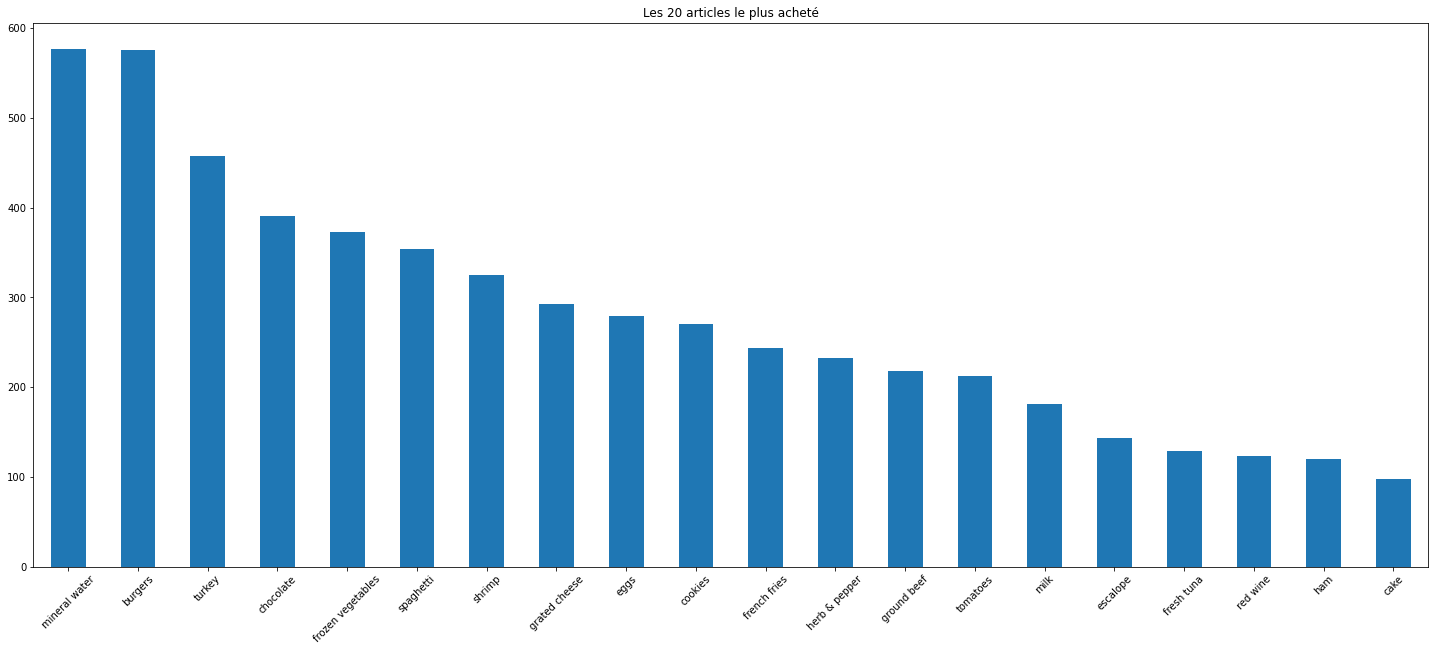

In [26]:
#Visualisation des 20 articles achetés le plus fréquemment
plt.figure(figsize=(25,10))
graph2 = data_MBO[0].value_counts().head(20)
graph2.plot.bar()
plt.xticks(rotation = 45)
plt.title("Les 20 articles le plus acheté")
plt.show()

In [22]:
#Transformation du dataset en tableau numpy
items_list = []
for i in range(data_MBO.shape[0]):
    items_list.append([str(data_MBO.values[i,j]) for j in range(data_MBO.shape[1])])
    
tab_numpy = np.array(items_list)
tab_numpy.shape

(7501, 20)

In [27]:
#Conversion de la liste en valeurs booléennes
te = TransactionEncoder()
df = te.fit_transform(tab_numpy)
df = pd.DataFrame(df,columns=te.columns_)
df.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [29]:
frequent_itemsets = apriori(df,min_support=0.01,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
510,0.011065,"(ground beef, nan, milk, mineral water)"
511,0.017064,"(ground beef, spaghetti, nan, mineral water)"
512,0.015731,"(spaghetti, nan, milk, mineral water)"
513,0.010265,"(nan, spaghetti, olive oil, mineral water)"


In [32]:
association_rules(frequent_itemsets,metric='confidence',min_threshold=0.7)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(almonds),(nan),0.020397,0.999867,0.020264,0.993464,0.993597,-0.000131,0.020397
1,(avocado),(nan),0.033329,0.999867,0.033196,0.996000,0.996133,-0.000129,0.033329
2,(barbecue sauce),(nan),0.010799,0.999867,0.010799,1.000000,1.000133,0.000001,inf
3,(black tea),(nan),0.014265,0.999867,0.014265,1.000000,1.000133,0.000002,inf
4,(body spray),(nan),0.011465,0.999867,0.011465,1.000000,1.000133,0.000002,inf
...,...,...,...,...,...,...,...,...,...
252,"(ground beef, milk, mineral water)",(nan),0.011065,0.999867,0.011065,1.000000,1.000133,0.000001,inf
253,"(spaghetti, ground beef, mineral water)",(nan),0.017064,0.999867,0.017064,1.000000,1.000133,0.000002,inf
254,"(spaghetti, milk, mineral water)",(nan),0.015731,0.999867,0.015731,1.000000,1.000133,0.000002,inf
255,"(spaghetti, olive oil, mineral water)",(nan),0.010265,0.999867,0.010265,1.000000,1.000133,0.000001,inf


In [33]:
association_rules(frequent_itemsets,metric= "lift",min_threshold = 1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,0.003654,1.168147
1,(mineral water),(avocado),0.238368,0.033329,0.011598,0.048658,1.459926,0.003654,1.016113
2,(barbecue sauce),(nan),0.010799,0.999867,0.010799,1.000000,1.000133,0.000001,inf
3,(nan),(barbecue sauce),0.999867,0.010799,0.010799,0.010800,1.000133,0.000001,1.000001
4,(black tea),(nan),0.014265,0.999867,0.014265,1.000000,1.000133,0.000002,inf
...,...,...,...,...,...,...,...,...,...
1677,"(nan, mineral water)","(pancakes, spaghetti)",0.238235,0.025197,0.011465,0.048125,1.909991,0.005462,1.024088
1678,(pancakes),"(spaghetti, nan, mineral water)",0.095054,0.059725,0.011465,0.120617,2.019529,0.005788,1.069244
1679,(spaghetti),"(pancakes, nan, mineral water)",0.174110,0.033729,0.011465,0.065850,1.952333,0.005593,1.034385
1680,(nan),"(pancakes, spaghetti, mineral water)",0.999867,0.011465,0.011465,0.011467,1.000133,0.000002,1.000002
